**Ensampe training with normal models VS deep learning models, using Voting, and Boosting**

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm, trange
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
import time
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Load the Data Sets

In [ ]:
incomedata = pd.read_csv('/content/gdrive/MyDrive/Distributed AI Final Project/adult.csv')

In [ ]:
incomedata.head()

,Age,Workclass,Final_Weight,Education,Education_Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
incomedata.shape

(32561, 15)

In [ ]:
incomedata['Class'].value_counts()

<=50K    24720
>50K      7841
Name: Class, dtype: int64

In [ ]:
col_names = incomedata.columns
col_names

Index(['Age', 'Workclass', 'Final_Weight', 'Education', 'Education_Number',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Class'],
      dtype='object')

# Pre-Processing

Remove all rows containing NULL values in any feature (if they exist)

In [ ]:
incomedata.dropna(how= 'any',axis=0) 

,Age,Workclass,Final_Weight,Education,Education_Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Some missing values are presented as ' ?' in the data set, so we remove those as well

In [ ]:
incomedata = incomedata.drop(incomedata[incomedata.Age == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Workclass == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Final_Weight == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Education == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Education_Number == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Marital_Status == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Occupation == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Relationship == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Race == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Sex == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Capital_Gain == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Capital_Loss == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Hours_Per_Week == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Native_Country == ' ?'].index)
incomedata = incomedata.drop(incomedata[incomedata.Class == ' ?'].index)


We can see that more than 2000 rows were Null or with ' ?' string and were dropped

In [ ]:
incomedata.shape

(30162, 15)

We now are going to transform all the string values into categorical or int ones, so we can train the models with them.
For that reason we encode each object feature with its own label encoder model

In [ ]:
from sklearn.preprocessing import LabelEncoder as LE

le1 = LE()
le1.fit(incomedata['Workclass'])
le2 = LE()
le2.fit(incomedata['Education'])
le3 = LE()
le3.fit(incomedata['Marital_Status'])
le4 = LE()
le4.fit(incomedata['Occupation'])
le5 = LE()
le5.fit(incomedata['Relationship'])
le6 = LE()
le6.fit(incomedata['Race'])
le7 = LE()
le7.fit(incomedata['Sex'])
le8 = LE()
le8.fit(incomedata['Native_Country'])
le9 = LE()
le9.fit(incomedata['Class'])


LabelEncoder()

In [ ]:
incomedata['Workclass'] = le1.transform(incomedata['Workclass'])
incomedata['Education'] = le2.transform(incomedata['Education'])
incomedata['Marital_Status'] = le3.transform(incomedata['Marital_Status'])
incomedata['Occupation'] = le4.transform(incomedata['Occupation'])
incomedata['Relationship'] = le5.transform(incomedata['Relationship'])
incomedata['Race'] = le6.transform(incomedata['Race'])
incomedata['Sex'] = le7.transform(incomedata['Sex'])
incomedata['Native_Country'] = le8.transform(incomedata['Native_Country'])
incomedata['Class'] = le9.transform(incomedata['Class'])

In [ ]:
incomedata.head()

,Age,Workclass,Final_Weight,Education,Education_Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


We can use the inverse_transform when we want to return all the tranformed values to their original string ones

In [ ]:
incomedata['Class'].value_counts()

0    22654
1     7508
Name: Class, dtype: int64

**We see that the data is very imbalanced**

So what we will do is fix this issue by oversampling. We will train the models both with the balanced and the imbalanced data sets to see the results

In [ ]:
x = incomedata.drop('Class', axis = 'columns')
y = incomedata['Class']

We will be using SMOTE to augument our data by creating new synthetuc data for the imbalanced class using k nearest neighbours

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'minority')

x_smote, y_smote = smote.fit_resample(x, y)

We see that the new sample has the same number of samples for both classes

In [ ]:
y_smote.value_counts()

0    22654
1    22654
Name: Class, dtype: int64

# Heterogeneous Bagging  Ensemble (using majority vote)

**Heterogeneous Bagging  ensemble using 3 'simple' models (Decission Tree, Stochastic Gradient Descent and Support Vector Classification**

## Using the imbalanced data set

### Using the simple models enemble

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [ ]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = SVC(probability=True)

Split data in test, train sets different ones for each classifier (bootstraps)

In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(incomedata.iloc[:,:-1], incomedata.iloc[:,-1], test_size=0.2, stratify = incomedata.iloc[:,-1])
X_train2, X_test2, y_train2, y_test2 = train_test_split(incomedata.iloc[:,:-1], incomedata.iloc[:,-1], test_size=0.2, stratify = incomedata.iloc[:,-1])
X_train3, X_test3, y_train3, y_test3 = train_test_split(incomedata.iloc[:,:-1], incomedata.iloc[:,-1], test_size=0.2, stratify = incomedata.iloc[:,-1])

In [ ]:
y_train3.shape

(24129,)

Train all the models, each one wtih a random sample of the data

In [ ]:
model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)
model3.fit(X_train3, y_train3)

SVC(probability=True)

In [ ]:
print('Decission Tree Accurace is', model1.score(X_test1, y_test1))
print('Logistic Regression Accuracy is', model2.score(X_test1, y_test1))
print('Support Vector Classifier Accuracy is', model3.score(X_test1, y_test1))

Decission Tree Accurace is 0.8168407094314603
Logistic Regression Accuracy is 0.7989391679098292
Support Vector Classifier Accuracy is 0.792143212332173


We can see below, that we clearly have overfitting in the Decission Tree Classifier

In [ ]:
print('For training set, Decission Tree Accuracy is', model1.score(X_train1, y_train1))
print('For training set, Stochastic Gradient Descent Accuracy is', model2.score(X_train2, y_train2))
print('For training set, Support Vector Classifier Accuracy is', model3.score(X_train3, y_train3))

For training set, Decission Tree Accuracy is 0.9999585560943264
For training set, Stochastic Gradient Descent Accuracy is 0.7936922375564673
For training set, Support Vector Classifier Accuracy is 0.7878900907621534


In [ ]:
#For the probability prediction

dcppred = model1.predict_proba(X_test1)
lrppred = model2.predict_proba(X_test1)
svcppred = model3.predict_proba(X_test1)

In [ ]:
#Find find the summed average of the models prob and use them for the roc curve

ensprob = np.zeros(shape = (len(dcppred),2))
for i in trange(0, len(dcppred)):
  ensprob[i][0] = (dcppred[i][0] + lrppred[i][0] + svcppred[i][0])/3
  ensprob[i][1] = (dcppred[i][1] + lrppred[i][1] + svcppred[i][1])/3

  0%|          | 0/6033 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import roc_curve , roc_auc_score

ens_auc = roc_auc_score(y_test1, ensprob[:, 1])

ns_fpr, ns_tpr, thresholds = roc_curve(y_test1, ensprob[:, 1])

In [ ]:
#For x = y in roc curve
y = []
x = []
for i in range (0, 50):
  y.append(i/50)
  x.append(i/50)

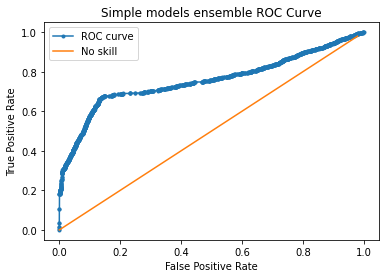

In [ ]:
pyplot.plot(ns_fpr, ns_tpr, marker='.', label='ROC curve')
pyplot.plot(y, x, label='No skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Simple models ensemble ROC Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
def voting_ensample_predict(model1, model2, model3, x_test):
  predictions= []
  pred1 = model1.predict(x_test)
  pred2 = model2.predict(x_test)
  pred3 = model3.predict(x_test)
  for i in range(0, len(pred1)):
    sof = [pred1[i], pred2[i], pred3[i]]
    choice = max(set(sof), key=sof.count)
    predictions.append(choice)
  return predictions



In [ ]:
bag = voting_ensample_predict(model1, model2, model3, X_test1)
bag_tr = voting_ensample_predict(model1, model2, model3, X_train1)

We can see below that we have fixed the overfitting problem that existed before, because even in the train set, the accuracy is almost same as the test set.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

print('Heterogeneous Bagging  Ensample Model Accuracy is', accuracy_score(bag, y_test1))
print('For training set, Heterogeneous Bagging  Ensample Model Accuracy is', accuracy_score(bag_tr, y_train1))


Heterogeneous Bagging  Ensample Model Accuracy is 0.8161776893751036
For training set, Heterogeneous Bagging  Ensample Model Accuracy is 0.8175639272245017


The classification report for this ensamble models is

In [ ]:
print(classification_report(y_test1, bag))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4531
           1       0.93      0.28      0.43      1502

    accuracy                           0.82      6033
   macro avg       0.87      0.64      0.66      6033
weighted avg       0.84      0.82      0.78      6033



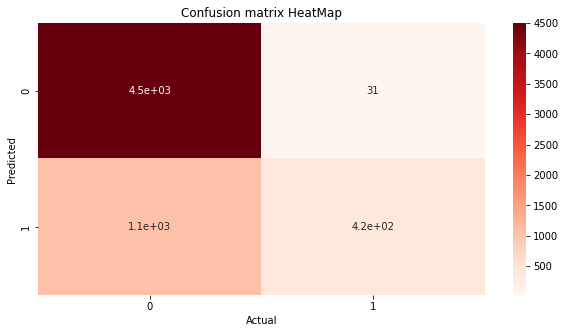

In [ ]:
aux_df = incomedata[['Class']].drop_duplicates().sort_values('Class')
conf_matrix = confusion_matrix(y_test1, bag)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Class'].values, 
            yticklabels=aux_df['Class'].values,
            cmap="Reds")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix HeatMap')
plt.show()

###Heterogeneous Bagging  ensemble using 3 NN models (3 autoencoders)

Deep neural networks are prone to overfitting because they learn millions or billions of parameters while building the model.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

We use MLP (Multilayer perceptron or Feed-forward network), because they are the most suitable for non-image and non-text classification

Because we will be using dense layers in our deep learning models, its necessary to standardise our data set, by substracting the mean value and dividing by the standard deviation. 

In [ ]:
new1= X_train1.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
new2 = X_train2.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
new3 = X_train3.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)

In [ ]:
X_test1s= X_test1.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
X_test2s = X_test2.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
X_test3s = X_test3.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)

In [ ]:
new1.shape

(24129, 11)

In [ ]:
new1

,Age,Workclass,Education,Education_Number,Marital_Status,Occupation,Relationship,Race,Sex,Hours_Per_Week,Native_Country
8786,57,4,11,9,6,2,1,4,0,38,38
15362,46,2,9,13,6,12,4,4,0,38,38
6570,28,4,15,10,2,11,3,1,1,63,34
18334,43,0,8,11,0,2,1,4,1,40,38
8531,51,2,8,11,2,5,0,4,1,40,11
...,...,...,...,...,...,...,...,...,...,...,...
3121,21,2,15,10,4,2,3,4,1,40,38
10648,36,2,11,9,2,2,0,4,1,40,38
11647,47,1,1,7,2,13,0,4,1,40,7
10471,18,2,11,9,4,0,3,4,0,15,38


In [ ]:
#We define the 3 deep learngin models, which slight variations in their parameters. The best loss function for binary classification are thsoe 3

model1d = tf.keras.Sequential()
model1d.add(keras.layers.Dense(10, input_dim=new1.shape[1], activation='relu', kernel_initializer='he_normal'))
model1d.add(keras.layers.Dense(1, activation='sigmoid'))
model1d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2d = tf.keras.Sequential()
model2d.add(keras.layers.Dense(10, input_dim=new2.shape[1], activation='LeakyReLU', kernel_initializer='he_normal'))
model2d.add(keras.layers.Dense(1, activation='sigmoid'))
model2d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model3d = tf.keras.Sequential()
model3d.add(keras.layers.Dense(10, input_dim=new3.shape[1], activation='sigmoid', kernel_initializer='he_normal'))
model3d.add(keras.layers.Dense(1, activation='sigmoid'))
model3d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/20
755/755 [==============================] - 7s 4ms/step - loss: 2.4495 - accuracy: 0.7107
Epoch 2/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4828 - accuracy: 0.7727
Epoch 3/20
755/755 [==============================] - 4s 5ms/step - loss: 0.4791 - accuracy: 0.7746
Epoch 4/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4708 - accuracy: 0.7810
Epoch 5/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4706 - accuracy: 0.7811
Epoch 6/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4686 - accuracy: 0.7823
Epoch 7/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4660 - accuracy: 0.7800
Epoch 8/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4599 - accuracy: 0.7871
Epoch 9/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4596 - accuracy: 0.7860
Epoch 10/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4566 - accuracy: 0.7871

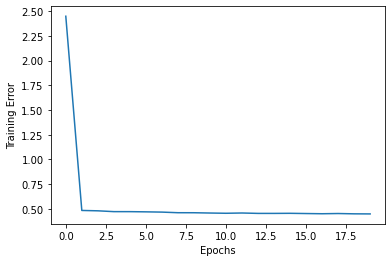

In [ ]:
#Train

hist1 = model1d.fit(new1, y_train1,epochs=20, verbose = 1)
plt.plot(hist1.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

Epoch 1/20
755/755 [==============================] - 4s 4ms/step - loss: 0.7771 - accuracy: 0.6863
Epoch 2/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4721 - accuracy: 0.7714
Epoch 3/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4616 - accuracy: 0.7818
Epoch 4/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4579 - accuracy: 0.7848
Epoch 5/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4545 - accuracy: 0.7866
Epoch 6/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4508 - accuracy: 0.7908
Epoch 7/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4509 - accuracy: 0.7885
Epoch 8/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4480 - accuracy: 0.7921
Epoch 9/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4459 - accuracy: 0.7910
Epoch 10/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4442 - accuracy: 0.7922

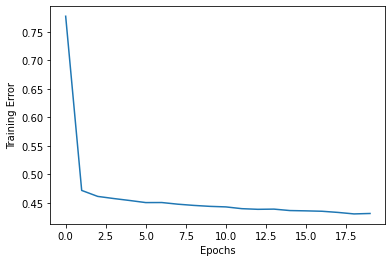

In [ ]:
hist2 = model2d.fit(new2, y_train2,epochs=20, verbose = 1)
plt.plot(hist2.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

Epoch 1/20
755/755 [==============================] - 4s 4ms/step - loss: 0.5643 - accuracy: 0.6983
Epoch 2/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4966 - accuracy: 0.7511
Epoch 3/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4738 - accuracy: 0.7511
Epoch 4/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4567 - accuracy: 0.7600
Epoch 5/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4451 - accuracy: 0.7815
Epoch 6/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4362 - accuracy: 0.7937
Epoch 7/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4291 - accuracy: 0.7980
Epoch 8/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4240 - accuracy: 0.8014
Epoch 9/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4194 - accuracy: 0.8036
Epoch 10/20
755/755 [==============================] - 3s 4ms/step - loss: 0.4162 - accuracy: 0.8045

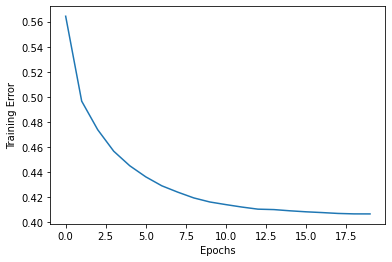

In [ ]:
hist3 = model3d.fit(new3, y_train3,epochs=20, verbose = 1)
plt.plot(hist3.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

In [ ]:
prediction_on_test_data1 = model1d.evaluate(X_test1s, y_test1)
print('Model 1')
print("Loss: ", prediction_on_test_data1[0])
print("Accuracy: ", np.round(prediction_on_test_data1[1] * 100,1))

prediction_on_test_data2 = model2d.evaluate(X_test2s, y_test2)
print('Model 2')
print("Loss: ", prediction_on_test_data2[0])
print("Accuracy: ", np.round(prediction_on_test_data2[1] * 100,1))

print('Model 3')
prediction_on_test_data3 = model3d.evaluate(X_test3s, y_test3)
print("Loss: ", prediction_on_test_data3[0])
print("Accuracy: ", np.round(prediction_on_test_data3[1] * 100,1))

189/189 [==============================] - 1s 3ms/step - loss: 0.4851 - accuracy: 0.7696
Model 1
Loss:  0.48506999015808105
Accuracy:  77.0
189/189 [==============================] - 1s 3ms/step - loss: 0.4338 - accuracy: 0.7948
Model 2
Loss:  0.4338012933731079
Accuracy:  79.5
Model 3
189/189 [==============================] - 1s 3ms/step - loss: 0.3939 - accuracy: 0.8231
Loss:  0.39385759830474854
Accuracy:  82.3


We can see below, that here we dont have the issue of overfitting

In [ ]:
prediction_on_test_data1 = model1d.evaluate(new1, y_train1)
print('Model 1')
print("Accuracy: ", np.round(prediction_on_test_data1[1] * 100,1))

prediction_on_test_data2 = model2d.evaluate(new2, y_train2)
print('Model 2')
print("Accuracy: ", np.round(prediction_on_test_data2[1] * 100,1))

print('Model 3')
prediction_on_test_data3 = model3d.evaluate(new3, y_train3)
print("Accuracy: ", np.round(prediction_on_test_data3[1] * 100,1))

755/755 [==============================] - 2s 3ms/step - loss: 0.4734 - accuracy: 0.7721
Model 1
Accuracy:  77.2
755/755 [==============================] - 2s 3ms/step - loss: 0.4344 - accuracy: 0.7968
Model 2
Accuracy:  79.7
Model 3
755/755 [==============================] - 2s 3ms/step - loss: 0.4053 - accuracy: 0.8109
Accuracy:  81.1


We now form the ensample of the 3 deep NN classifiers, by averaging their output (example (0.5+0.6+0.2)/3 < 0.5 so class = 0)

In [ ]:
def voting_ensample_predict_deep(model1, model2, model3, X_test):
  prob = np.zeros(shape = (len(X_test),2))
  p1 = model1.predict(X_test)
  p2 = model2.predict(X_test)
  p3 = model3.predict(X_test)
  final = []
  for i in range (0, len(p1)):
    if (p1[i] + p2[i] + p3[i])/3 >= 0.5:
      final.append(1)
      prob[i][1] = (p1[i] + p2[i] + p3[i])/3
      prob[i][0] = 1 - (p1[i] + p2[i] + p3[i])/3
    else:
      final.append(0)
      prob[i][0] = 1 - (p1[i] + p2[i] + p3[i])/3
      prob[i][1] = (p1[i] + p2[i] + p3[i])/3
  return final, prob

In [ ]:
ens_pred, ens_pred_prob = voting_ensample_predict_deep(model1d, model2d, model3d, X_test1s)
ens_pred_train = voting_ensample_predict_deep(model1d, model2d, model3d, new1)[0]

In [ ]:
ens_auc_deep = roc_auc_score(y_test1, ens_pred_prob[:, 1])

ns_fpr2, ns_tpr2, thresholds2 = roc_curve(y_test1, ens_pred_prob[:, 1])

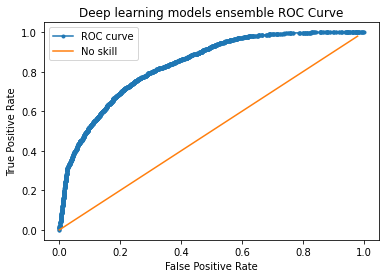

In [ ]:
pyplot.plot(ns_fpr2, ns_tpr2, marker='.', label='ROC curve')
pyplot.plot(y, x, label='No skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Deep learning models ensemble ROC Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print('Deep learning Heterogeneous Bagging  Ensample Model Accuracy is', accuracy_score(y_test1, ens_pred)) 
print('For training set, Deep learning Heterogeneous Bagging  Ensample Model Accuracy is', accuracy_score(y_train1, ens_pred_train))

Deep learning Heterogeneous Bagging  Ensample Model Accuracy is 0.809050223769269
For training set, Deep learning Heterogeneous Bagging  Ensample Model Accuracy is 0.8046334286543164


Classification Report

In [ ]:
print(classification_report(y_test1, ens_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4531
           1       0.78      0.33      0.46      1502

    accuracy                           0.81      6033
   macro avg       0.79      0.65      0.67      6033
weighted avg       0.80      0.81      0.78      6033



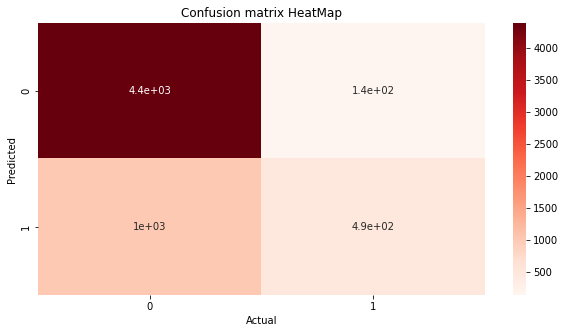

In [ ]:
conf_matrix = confusion_matrix(y_test1, ens_pred)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Class'].values, 
            yticklabels=aux_df['Class'].values,
            cmap="Reds")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix HeatMap')
plt.show()

## Using the Balanced data set

### Simple models ensemble

Maybe normalise x_smote numerical values

In [ ]:
X_train1s, X_test1s, y_train1s, y_test1s = train_test_split(x_smote, y_smote, test_size=0.2, stratify = y_smote, random_state = 4)
X_train2s, X_test2s, y_train2s, y_test2s = train_test_split(x_smote, y_smote, test_size=0.2, stratify = y_smote, random_state = 3)
X_train3s, X_test3s, y_train3s, y_test3s = train_test_split(x_smote, y_smote, test_size=0.4, stratify = y_smote, random_state = 2)

In [ ]:
X_train1sm= X_train1s.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
X_train2sm = X_train2s.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
X_train3sm = X_train3s.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
X_test1sm= X_test1s.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
X_test2sm = X_test2s.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
X_test3sm = X_test3s.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)

In [ ]:
y_train3s.shape

(27184,)

In [ ]:
# starting time
start_simple = time.time()

In [ ]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = SVC(probability=True, C = 1)

In [ ]:
model1.fit(X_train1sm, y_train1s)
model2.fit(X_train2sm, y_train2s)
model3.fit(X_train3sm, y_train3s)

SVC(C=1, probability=True)

In [ ]:
stop_simple = time.time()
time1 = stop_simple - start_simple
print(time1)

187.7373068332672


In [ ]:
print('Decission Tree Accurace is', model1.score(X_test1sm, y_test1s))
print('Logistic Regression Accuracy is', model2.score(X_test1sm, y_test1s))
print('Support Vector Classifier Accuracy is', model3.score(X_test1sm, y_test1s))

Decission Tree Accurace is 0.8332597660560582
Logistic Regression Accuracy is 0.7466342970646657
Support Vector Classifier Accuracy is 0.772897815051865


The dec tree overfits again

In [ ]:
print('For training set, Decission Tree Accuracy is', model1.score(X_train1sm, y_train1s))
print('For training set, Stochastic Gradient Descent Accuracy is', model2.score(X_train2sm, y_train2s))
print('For training set, Support Vector Classifier Accuracy is', model3.score(X_train3sm, y_train3s))

For training set, Decission Tree Accuracy is 0.9768526182199415
For training set, Stochastic Gradient Descent Accuracy is 0.7497654913645644
For training set, Support Vector Classifier Accuracy is 0.7707107121836374


In [ ]:
#For the probability prediction

dcppred = model1.predict_proba(X_test1sm)
lrppred = model2.predict_proba(X_test1sm)
svcppred = model3.predict_proba(X_test1sm)

In [ ]:
#Find the summed average of the models prob and use them for the roc curve

ensprob = np.zeros(shape = (len(dcppred),2))
for i in trange(0, len(dcppred)):
  ensprob[i][0] = (dcppred[i][0] + lrppred[i][0] + svcppred[i][0])/3
  ensprob[i][1] = (dcppred[i][1] + lrppred[i][1] + svcppred[i][1])/3

  0%|          | 0/9062 [00:00<?, ?it/s]

In [ ]:
ens_auc = roc_auc_score(y_test1s, ensprob[:, 1])

ns_fpr, ns_tpr, thresholds = roc_curve(y_test1s, ensprob[:, 1])

In [ ]:
ens_auc

0.9046643585927903

In [ ]:
#For x = y in roc curve
y = []
x = []
for i in range (0, 50):
  y.append(i/50)
  x.append(i/50)

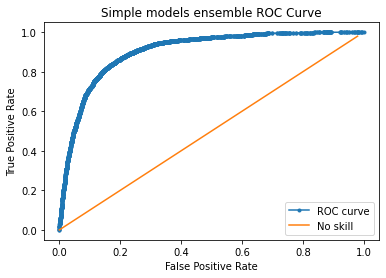

In [ ]:
pyplot.plot(ns_fpr, ns_tpr, marker='.', label='ROC curve')
pyplot.plot(y, x, label='No skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Simple models ensemble ROC Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
bag = voting_ensample_predict(model1, model2, model3, X_test1sm)
bag_tr = voting_ensample_predict(model1, model2, model3, X_train1sm)

print('Heterogeneous Bagging  Ensample Model Accuracy is', accuracy_score(bag, y_test1s))
print('For training set, Heterogeneous Bagging  Ensample Model Accuracy is', accuracy_score(bag_tr, y_train1s))

Heterogeneous Bagging  Ensample Model Accuracy is 0.7935334363275215
For training set, Heterogeneous Bagging  Ensample Model Accuracy is 0.8144071069911163


In [ ]:
print(classification_report(y_test1s, bag))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      4531
           1       0.77      0.84      0.80      4531

    accuracy                           0.79      9062
   macro avg       0.80      0.79      0.79      9062
weighted avg       0.80      0.79      0.79      9062



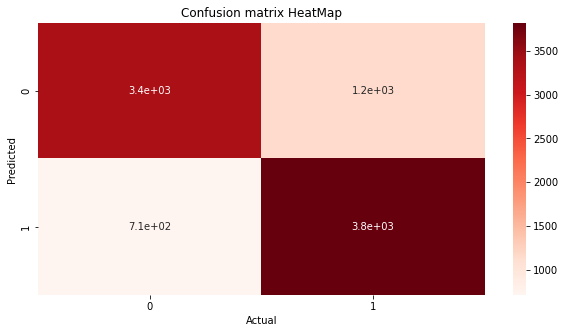

In [ ]:
aux_df = incomedata[['Class']].drop_duplicates().sort_values('Class')
conf_matrix = confusion_matrix(y_test1s, bag)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Class'].values, 
            yticklabels=aux_df['Class'].values,
            cmap="Reds")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix HeatMap')
plt.show()

### NN models ensemble

In [ ]:
new1s= X_train1s.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
new2s = X_train2s.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
new3s = X_train3s.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)

In [ ]:
new1s.shape

(36246, 11)

In [ ]:
X_test1ss= X_test1s.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
X_test2ss = X_test2s.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)
X_test3ss = X_test3s.drop(['Capital_Gain', 'Capital_Loss', 'Final_Weight'], 1)

In [ ]:
#We define the 3 NN models, which slight variations in their parameters. The best loss function for binary classification are thsoe 3

model1d = tf.keras.Sequential()
model1d.add(keras.layers.Dense(10, input_dim=new1s.shape[1], activation='relu', kernel_initializer='he_normal'))
model1d.add(keras.layers.Dense(1, activation='sigmoid'))
model1d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2d = tf.keras.Sequential()
model2d.add(keras.layers.Dense(10, input_dim=new2s.shape[1], activation='LeakyReLU', kernel_initializer='he_normal'))
model2d.add(keras.layers.Dense(1, activation='sigmoid'))
model2d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model3d = tf.keras.Sequential()
model3d.add(keras.layers.Dense(10, input_dim=new3s.shape[1], activation='sigmoid', kernel_initializer='he_normal'))
model3d.add(keras.layers.Dense(1, activation='sigmoid'))
model3d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
start_NN = time.time()

In [ ]:
#Train

hist1 = model1d.fit(new1s, y_train1s,epochs=20, verbose = 1)

Epoch 1/20
1133/1133 [==============================] - 5s 4ms/step - loss: 0.8905 - accuracy: 0.6333
Epoch 2/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.5065 - accuracy: 0.7476
Epoch 3/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.4968 - accuracy: 0.7529
Epoch 4/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.4948 - accuracy: 0.7553
Epoch 5/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.4935 - accuracy: 0.7559
Epoch 6/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.4908 - accuracy: 0.7585
Epoch 7/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.4831 - accuracy: 0.7629
Epoch 8/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.4783 - accuracy: 0.7661
Epoch 9/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.4745 - accuracy: 0.7676
Epoch 10/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.468

In [ ]:
hist2 = model2d.fit(new2s, y_train2s,epochs=20, verbose = 1)

Epoch 1/20
1133/1133 [==============================] - 5s 4ms/step - loss: 0.9047 - accuracy: 0.6587
Epoch 2/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.5292 - accuracy: 0.7442
Epoch 3/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.5243 - accuracy: 0.7436
Epoch 4/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.5265 - accuracy: 0.7432
Epoch 5/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.5282 - accuracy: 0.7392
Epoch 6/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.5235 - accuracy: 0.7436
Epoch 7/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.5228 - accuracy: 0.7438
Epoch 8/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.5260 - accuracy: 0.7431
Epoch 9/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.5231 - accuracy: 0.7456
Epoch 10/20
1133/1133 [==============================] - 4s 4ms/step - loss: 0.524

In [ ]:
hist3 = model3d.fit(new3s, y_train3s,epochs=20, verbose = 1)

Epoch 1/20
850/850 [==============================] - 4s 4ms/step - loss: 0.6498 - accuracy: 0.6344
Epoch 2/20
850/850 [==============================] - 3s 4ms/step - loss: 0.5634 - accuracy: 0.7065
Epoch 3/20
850/850 [==============================] - 3s 4ms/step - loss: 0.5367 - accuracy: 0.7280
Epoch 4/20
850/850 [==============================] - 3s 4ms/step - loss: 0.5184 - accuracy: 0.7416
Epoch 5/20
850/850 [==============================] - 3s 4ms/step - loss: 0.5001 - accuracy: 0.7538
Epoch 6/20
850/850 [==============================] - 3s 4ms/step - loss: 0.4854 - accuracy: 0.7643
Epoch 7/20
850/850 [==============================] - 3s 4ms/step - loss: 0.4754 - accuracy: 0.7705
Epoch 8/20
850/850 [==============================] - 3s 4ms/step - loss: 0.4677 - accuracy: 0.7729
Epoch 9/20
850/850 [==============================] - 3s 4ms/step - loss: 0.4620 - accuracy: 0.7780
Epoch 10/20
850/850 [==============================] - 3s 4ms/step - loss: 0.4571 - accuracy: 0.7825

In [ ]:
stop_NN = time.time()

time2 = stop_NN - start_NN

In [ ]:
time2

367.3198299407959

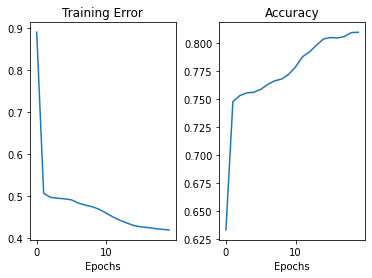

In [ ]:
#For model 1
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(hist1.history["loss"])
ax1.set_title('Training Error')
ax1.set(xlabel='Epochs')
ax2.plot(hist1.history['accuracy'])
ax2.set_title('Accuracy')
ax2.set(xlabel='Epochs')
fig.subplots_adjust(wspace=0.3)

[Text(0.5, 0, 'Epochs')]

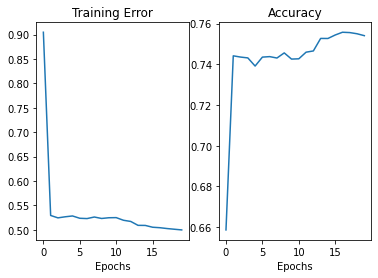

In [ ]:
#For model 2
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(hist2.history["loss"])
ax1.set_title('Training Error')
ax1.set(xlabel='Epochs')
ax2.plot(hist2.history['accuracy'])
ax2.set_title('Accuracy')
ax2.set(xlabel='Epochs')

[Text(0.5, 0, 'Epochs')]

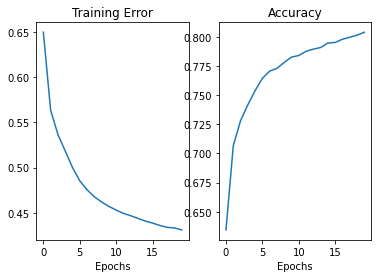

In [ ]:
#For model 3
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(hist3.history["loss"])
ax1.set_title('Training Error')
ax1.set(xlabel='Epochs')
ax2.plot(hist3.history['accuracy'])
ax2.set_title('Accuracy')
ax2.set(xlabel='Epochs')

In [ ]:
prediction_on_test_data1 = model1d.evaluate(X_test1ss, y_test1s)
print('Model 1')
print("Loss: ", prediction_on_test_data1[0])
print("Accuracy: ", np.round(prediction_on_test_data1[1] * 100,1))

prediction_on_test_data2 = model2d.evaluate(X_test2ss, y_test2s)
print('Model 2')
print("Loss: ", prediction_on_test_data2[0])
print("Accuracy: ", np.round(prediction_on_test_data2[1] * 100,1))

print('Model 3')
prediction_on_test_data3 = model3d.evaluate(X_test3ss, y_test3s)
print("Loss: ", prediction_on_test_data3[0])
print("Accuracy: ", np.round(prediction_on_test_data3[1] * 100,1))

284/284 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.8077
Model 1
Loss:  0.42574846744537354
Accuracy:  80.8
284/284 [==============================] - 1s 3ms/step - loss: 0.5232 - accuracy: 0.7365
Model 2
Loss:  0.5231739282608032
Accuracy:  73.6
Model 3
567/567 [==============================] - 2s 3ms/step - loss: 0.4283 - accuracy: 0.8041
Loss:  0.42830243706703186
Accuracy:  80.4


In [ ]:
ens_pred, ens_pred_prob = voting_ensample_predict_deep(model1d, model2d, model3d, X_test1ss)
ens_pred_train = voting_ensample_predict_deep(model1d, model2d, model3d, new1s)[0]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [ ]:
ens_auc_deep = roc_auc_score(y_test1s, ens_pred_prob[:, 1])

ns_fpr3, ns_tpr3, thresholds3 = roc_curve(y_test1s, ens_pred_prob[:, 1])

In [ ]:
#AUC score
ens_auc_deep

0.8851067471584578

In [ ]:
#For x = y in roc curve
y = []
x = []
for i in range (0, 50):
  y.append(i/50)
  x.append(i/50)

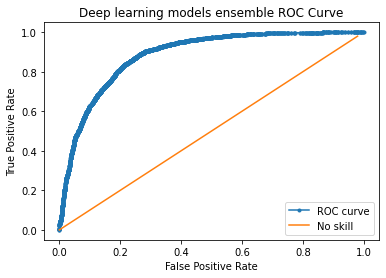

In [ ]:
pyplot.plot(ns_fpr3, ns_tpr3, marker='.', label='ROC curve')
pyplot.plot(y, x, label='No skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Deep learning models ensemble ROC Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print('Deep learning Heterogeneous Bagging  Ensample Model Accuracy is', accuracy_score(y_test1s, ens_pred)) 
print('For training set, Deep learning Heterogeneous Bagging  Ensample Model Accuracy is', accuracy_score(y_train1s, ens_pred_train))

Deep learning Heterogeneous Bagging  Ensample Model Accuracy is 0.8007062458618407
For training set, Deep learning Heterogeneous Bagging  Ensample Model Accuracy is 0.7989571263035922


In [ ]:
print(classification_report(y_test1s, ens_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      4531
           1       0.81      0.78      0.80      4531

    accuracy                           0.80      9062
   macro avg       0.80      0.80      0.80      9062
weighted avg       0.80      0.80      0.80      9062



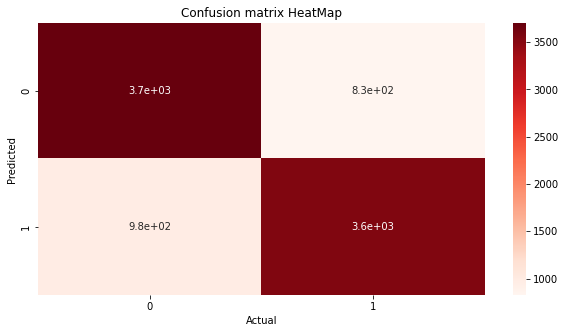

In [ ]:
conf_matrix = confusion_matrix(y_test1s, ens_pred)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Class'].values, 
            yticklabels=aux_df['Class'].values,
            cmap="Reds")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix HeatMap')
plt.show()